# Indian Crop yield data from year 1997-2020

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv('crop_yield.csv')

In [53]:
df = df[df['Crop_Year'] != 2020]

In [54]:
df.head(5)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [55]:
df.shape

(19652, 10)

In [56]:
df['Season'].unique()

array(['Whole Year ', 'Kharif     ', 'Rabi       ', 'Autumn     ',
       'Summer     ', 'Winter     '], dtype=object)

In [57]:
# removing spaces prresent in season column
df['Season'] = df['Season'].str.strip()

In [58]:
df['Fertilizer'] = df['Fertilizer'].apply(lambda x: x/1000)
df['Fertilizer'] = df['Fertilizer'].apply(lambda x: np.round(x,3))

df['Pesticide'] = df['Pesticide'].apply(lambda x: x/1000)
df['Pesticide'] = df['Pesticide'].apply(lambda x: np.round(x,3))

In [59]:
df['Input_Per_Unit_Area'] = (df['Fertilizer'] + df['Pesticide']) / df['Area']

In [60]:
df.drop(columns=['Fertilizer','Pesticide'], inplace=True)

In [61]:
df.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Yield', 'Input_Per_Unit_Area'],
      dtype='object')

In [62]:
df['Season'].unique()

array(['Whole Year', 'Kharif', 'Rabi', 'Autumn', 'Summer', 'Winter'],
      dtype=object)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19652 entries, 0 to 19688
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Crop                 19652 non-null  object 
 1   Crop_Year            19652 non-null  int64  
 2   Season               19652 non-null  object 
 3   State                19652 non-null  object 
 4   Area                 19652 non-null  float64
 5   Production           19652 non-null  int64  
 6   Annual_Rainfall      19652 non-null  float64
 7   Yield                19652 non-null  float64
 8   Input_Per_Unit_Area  19652 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 1.5+ MB


In [64]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Yield,Input_Per_Unit_Area
count,19652.000000,1.965200e+04,1.965200e+04,19652.000000,19652.000000,19652.000000
mean,2009.107114,1.802186e+05,1.646637e+07,1437.988276,80.096221,0.137327
std,6.487049,7.334823e+05,2.633034e+08,817.660607,879.126357,0.026138
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,0.000000,0.094800
25%,2004.000000,1.396500e+03,1.400000e+03,940.700000,0.599167,0.108550
50%,2010.000000,9.333000e+03,1.383000e+04,1247.000000,1.030000,0.144760
75%,2015.000000,7.523700e+04,1.230028e+05,1643.700000,2.390357,0.158000
max,2019.000000,5.080810e+07,6.326000e+09,6552.700000,21105.000000,0.172500


# Univariate Analysis

In [65]:
df.head(5)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Yield,Input_Per_Unit_Area
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,0.796087,0.09548
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,0.710435,0.09548
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,0.238333,0.09548
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,5238.051739,0.09548
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,0.420909,0.09548


## Crop:

In [66]:
df['Crop'].nunique()

55

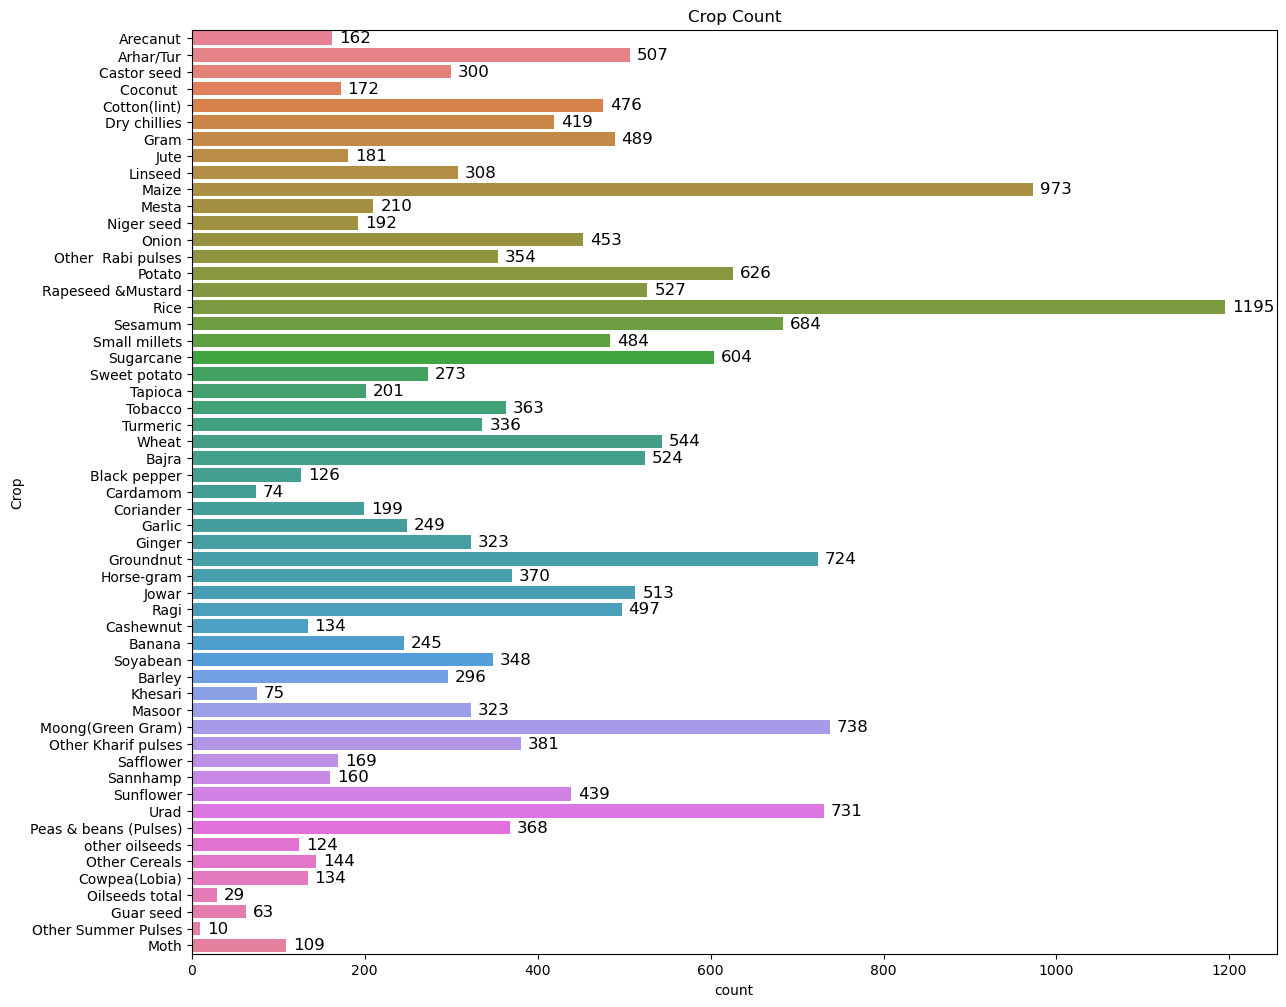

In [67]:
plt.figure(figsize=(14,12))
ax = sns.countplot(y='Crop',orient='h', palette='husl',data=df)

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=12, color='black', xytext=(5, 0), 
                textcoords='offset points')

# Show plot
plt.title('Crop Count')
plt.show()

__Insights_crop:__
    
    - Rice,Maize,Groundnut,Moong these are some crops which are moslty cultivated across india in different states.


## Crop_Year:

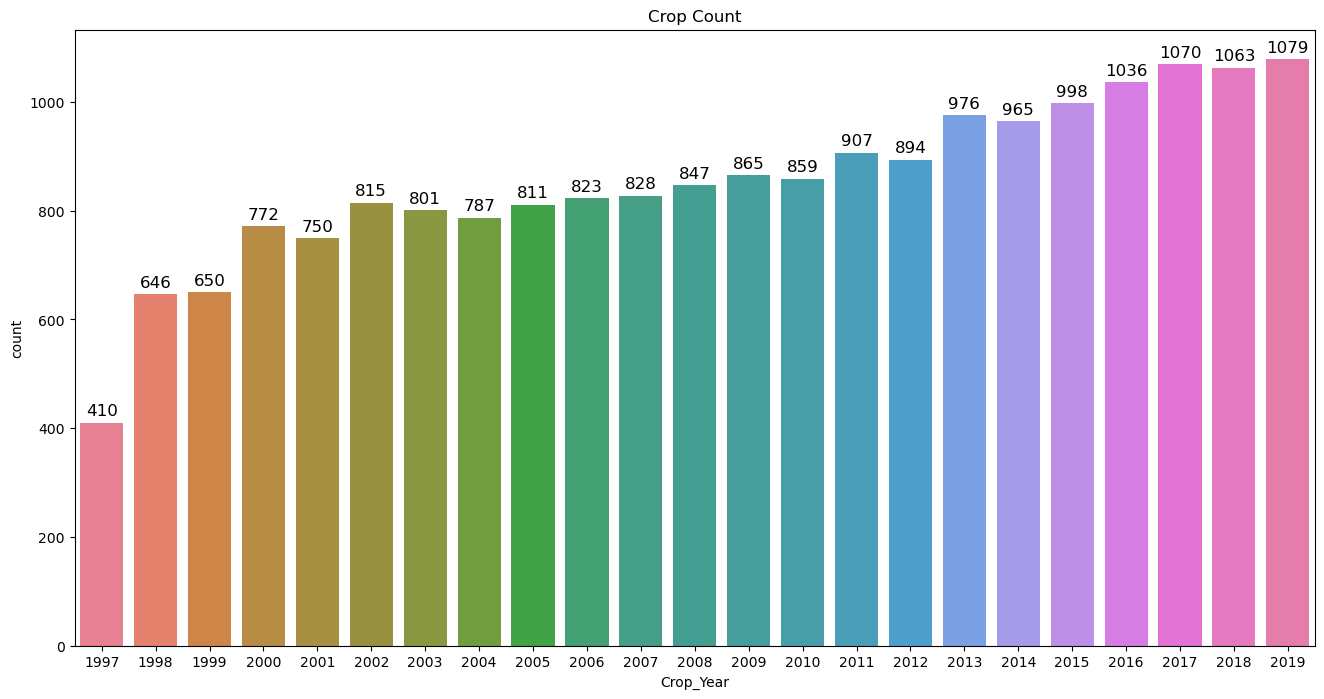

In [68]:
plt.figure(figsize=(16,8))
ax = sns.countplot(x='Crop_Year', palette='husl',data=df)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Show plot
plt.title('Crop Count')
plt.show()

__Insights_crop_year:__

    - we can see over the years crop cultivation was significantly increased across india.
    - unfortunately, for 2020 we have less data that's why it is less.

## Season:

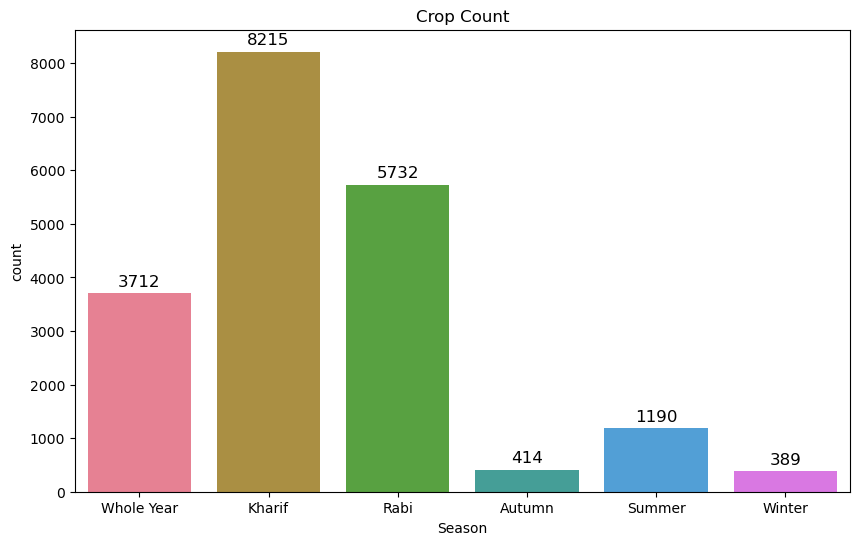

In [69]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Season', palette='husl',data=df)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Show plot
plt.title('Crop Count')
plt.show()

__Insights_Season:__

    - Most of the crops are cultivated in kharif season (june to october)

## State:

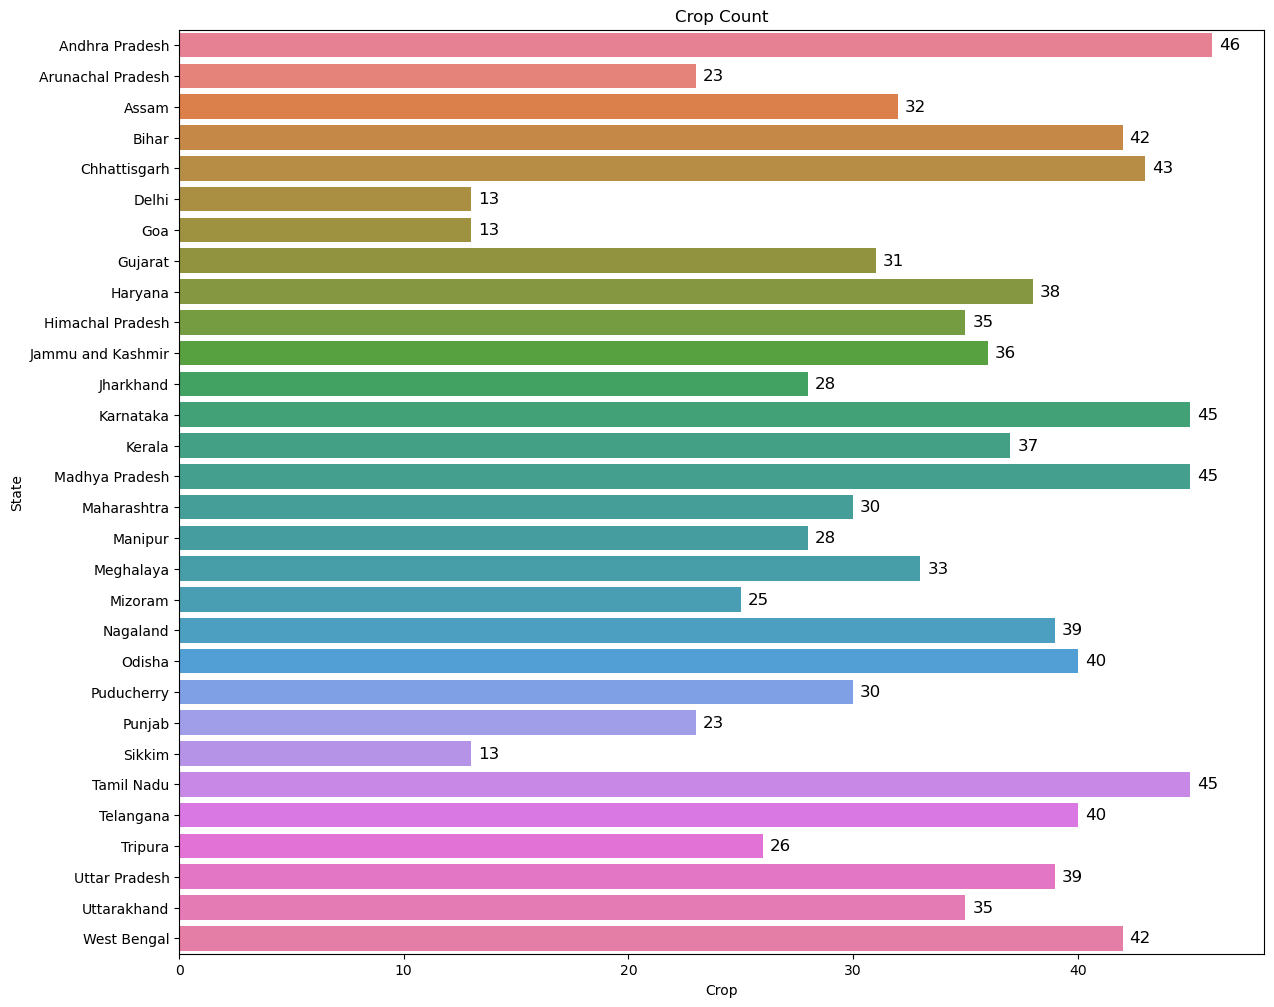

In [70]:
statewise_unique_crops = df.groupby('State')['Crop'].nunique().reset_index()

plt.figure(figsize=(14,12))
ax = sns.barplot(x='Crop',y='State',orient='h', palette='husl',data=statewise_unique_crops)

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=12, color='black', xytext=(5, 0), 
                textcoords='offset points')

# Show plot
plt.title('Crop Count')
plt.show()

__Insights_State:__

    - Different number of crops cultivated in different states of india

## Area:

In [71]:
df['Area'].skew()

21.83970920114199

In [72]:
from scipy.stats import mstats

# Winsorize the 'Area' column to cap extreme values
Area_winsorized = mstats.winsorize(df['Area'], limits=[0.05, 0.05])

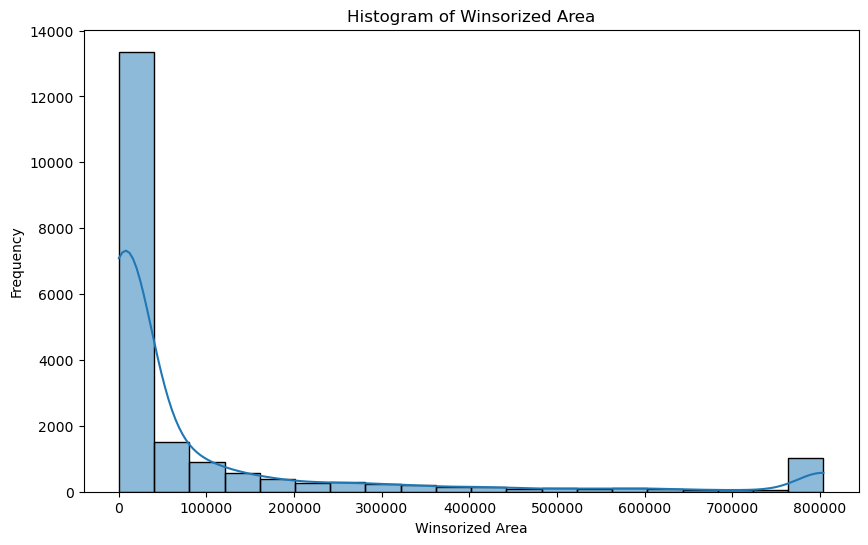

In [73]:
plt.figure(figsize=(10, 6))
sns.histplot(Area_winsorized, kde=True, bins=20, edgecolor='k')
plt.title('Histogram of Winsorized Area')
plt.xlabel('Winsorized Area')
plt.ylabel('Frequency')
plt.show()

<Axes: >

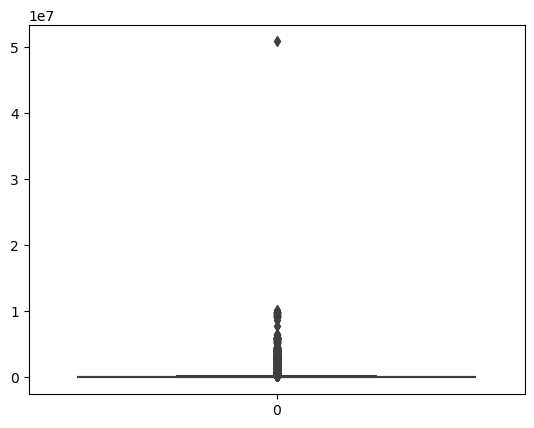

In [74]:
sns.boxplot(df['Area'])

__Insights_area:__
    
    - skewness is 21.8582 it means too much means right skewed data.
    - May be we will need any power transformation to apply(i.e yeo-johnson transformation)
    - transformation will helps us in stabilizing variance and improve model performance
    - according to boxplot we can see there are outliers to deal

## Production:

In [75]:
df['Production'].skew()

19.28091449463612

In [76]:
production_winsorized = mstats.winsorize(df['Production'], limits=[0.05, 0.05])

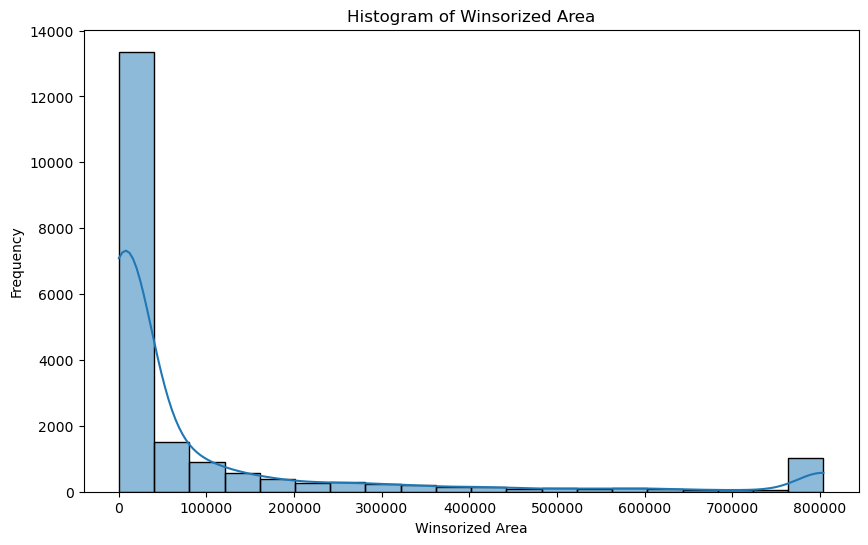

In [77]:
plt.figure(figsize=(10, 6))
sns.histplot(Area_winsorized, kde=True, bins=20, edgecolor='k')
plt.title('Histogram of Winsorized Area')
plt.xlabel('Winsorized Area')
plt.ylabel('Frequency')
plt.show()

<Axes: >

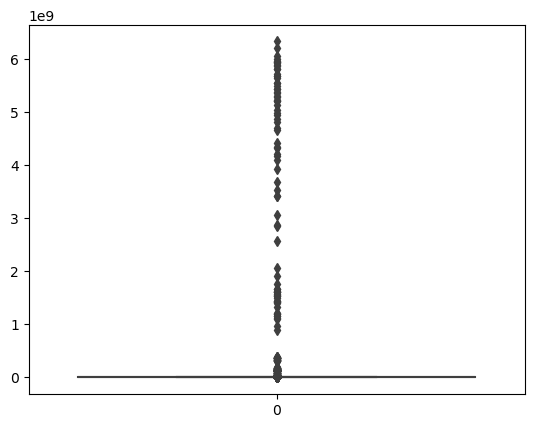

In [78]:
sns.boxplot(df['Production'])

__Insights_Production:__

    - skewness is 19.29, so high, needs transformation
    - outliers to deal with
    - same as area column

## Annual Rainfall:

In [79]:
df['Annual_Rainfall'].skew()

2.1290707027255222

In [80]:
df['Annual_Rainfall'].mean()

1437.988276146438

<Axes: xlabel='Annual_Rainfall', ylabel='Count'>

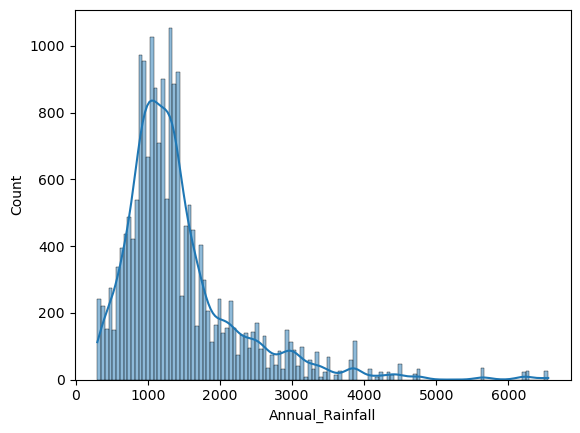

In [81]:
sns.histplot(df['Annual_Rainfall'], kde=True)

<Axes: >

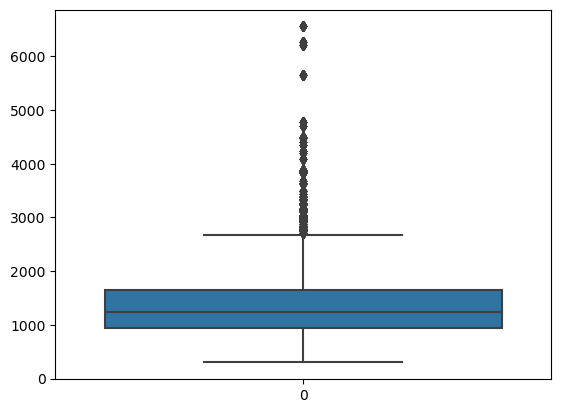

In [82]:
sns.boxplot(df['Annual_Rainfall'])

__Insights_annual_rainfall:__

    - there are some outliers also
    - there is not much in univariate analysis for annual rainfall
    - bivariate analysis with crop_year and yield will give us some useful information

## Input_per_unit_area:

__Basically fertilizer and pesticide used per unit area(in hectres)__

<Axes: xlabel='Input_Per_Unit_Area', ylabel='Count'>

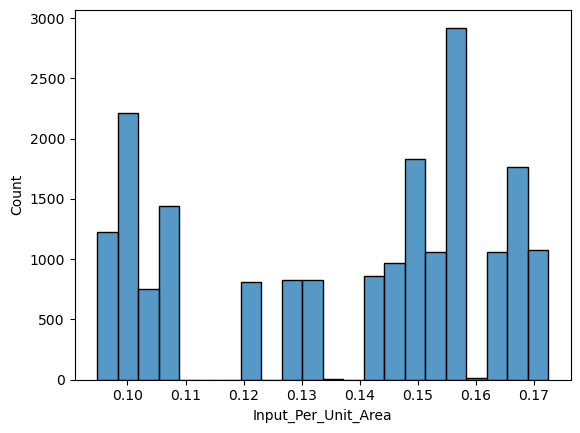

In [83]:
sns.histplot(df['Input_Per_Unit_Area'])

<Axes: >

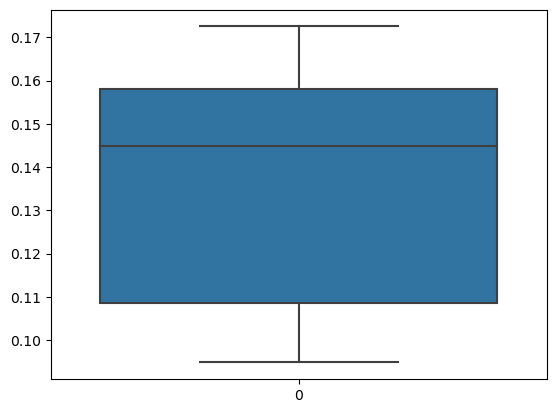

In [84]:
sns.boxplot(df['Input_Per_Unit_Area'])

# Summary

- Overall, Numerical countinous variables has high skewness and needs power transformation.
- Bivariate analysis can give important information
- over the years various crop cultivation was increased across India
- There are __55 different crop__ that are cultivated in India
- __Rice,Maize,Groundnut,Moong__ these are top most cultivated crops

# Feature Engineering

- Converting year column into year interval of 90s, 2000s and 2010s
- creating new __input per unit area__ column using 
        
        formula --->  (Fertilizer + Pesticide) / area